In [6]:
#https://github.com/ArijitChakrabarti/Insurance-Churn-Prediction/blob/main/Insurance%201.0.ipynb
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

import pandas as pd
import numpy as np
pd.set_option('Display.max_rows', None)
pd.set_option('Display.max_columns', None)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

df = pd.read_csv('clean_data.csv')
df.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,dept_name,dept_head,age,gender,marital_status,filed_complaint
0,246.0,D00-OT,0.866838,6,0,medium,0.134415,Left,4.0,124467,NaN,NaN,42.0,Female,Married,0
1,134.0,D00-OT,0.555718,2,0,low,0.511041,Left,3.0,112210,NaN,NaN,23.0,Female,Unmarried,0
2,156.0,D00-SS,0.474082,2,0,medium,0.405101,Left,3.0,126150,Sales,Edward J Bayley,24.0,Female,Unmarried,1
3,256.0,D00-SP,0.961360,6,0,low,0.152974,Left,4.0,125346,Support,Amelia Westray,51.0,Female,Married,0
4,146.0,D00-SS,0.507349,2,0,medium,0.434845,Left,3.0,113707,Sales,Edward J Bayley,23.0,Female,Unmarried,0


In [2]:
df.isnull().any()

avg_monthly_hrs      False
dept_id              False
last_evaluation      False
n_projects           False
recently_promoted    False
salary               False
satisfaction         False
status               False
tenure               False
employee_id          False
dept_name             True
dept_head             True
age                  False
gender               False
marital_status       False
filed_complaint      False
dtype: bool

In [19]:
#dropping columns dept_name and dept_head which have null values and are not important from machine learning perspective
df.drop(['dept_name', 'dept_head', 'employee_id'], axis = 1, inplace = True)
df.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,filed_complaint
0,246.0,D00-OT,0.866838,6,0,medium,0.134415,Left,4.0,42.0,Female,Married,0
1,134.0,D00-OT,0.555718,2,0,low,0.511041,Left,3.0,23.0,Female,Unmarried,0
2,156.0,D00-SS,0.474082,2,0,medium,0.405101,Left,3.0,24.0,Female,Unmarried,1
3,256.0,D00-SP,0.961360,6,0,low,0.152974,Left,4.0,51.0,Female,Married,0
4,146.0,D00-SS,0.507349,2,0,medium,0.434845,Left,3.0,23.0,Female,Unmarried,0


In [20]:
df.info() #identifying the categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14116 entries, 0 to 14115
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   dept_id            14116 non-null  object 
 2   last_evaluation    14116 non-null  float64
 3   n_projects         14116 non-null  int64  
 4   recently_promoted  14116 non-null  int64  
 5   salary             14116 non-null  object 
 6   satisfaction       14116 non-null  float64
 7   status             14116 non-null  object 
 8   tenure             14116 non-null  float64
 9   age                14116 non-null  float64
 10  gender             14116 non-null  object 
 11  marital_status     14116 non-null  object 
 12  filed_complaint    14116 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
'''
cols = df.columns  #getting the column names together
cols2 = []  #creating an empty listg
for c in cols:   
    if df[c].dtype == 'O':
        cols2.append(c)
print(cols2)  #checking to see if all the object columns are covered
df2 = pd.get_dummies(df, columns = cols2,drop_first = True)
print(df2.shape)
df2.head()  # there are no categorical columns anymore
#left = 1
#try using fit_transform - salary, dept, 
'''

In [23]:
#initializing label encoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.

df['salary']=le.fit_transform(df['salary'])
df['gender']=le.fit_transform(df['gender'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['dept_id'] = le.fit_transform(df['dept_id'])
df['status'] = le.fit_transform(df['status'])
#apply to department
df.head()

,avg_monthly_hrs,dept_id,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status,filed_complaint
0,246.0,6,0.866838,6,0,2,0.134415,1,4.0,42.0,0,0,0
1,134.0,6,0.555718,2,0,1,0.511041,1,3.0,23.0,0,1,0
2,156.0,10,0.474082,2,0,2,0.405101,1,3.0,24.0,0,1,1
3,256.0,9,0.961360,6,0,1,0.152974,1,4.0,51.0,0,0,0
4,146.0,10,0.507349,2,0,2,0.434845,1,3.0,23.0,0,1,0


In [24]:
df.groupby('dept_id').mean()
df.dept_id.value_counts()

10    3895
1     2573
9     2108
3     1359
7      853
5      812
2      722
6      706
4      590
0      175
8      173
11     150
Name: dept_id, dtype: int64

In [25]:
print(3355/14116)
print(df.status.value_counts())
print(df.filed_complaint.value_counts())

0.2376735619155568
0    10761
1     3355
Name: status, dtype: int64
0    12075
1     2041
Name: filed_complaint, dtype: int64


In [110]:
#building a reusable function for experimentation
#we need to check for threshold, accuracy_score, precision_score, recall, harmonic mean
#we also need to check for group_id, employee_id, employee_name, reference_value, prediction, threshold_5,threshold_7
#check with different values for test split - try 0.3 also
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


def output(X,y,model):
    '''
    Automating, split, model fit, model params, prediction, classification report, confusion matrix 
    '''
    print('Being performed for', model)
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) 
    #splitting to train and test
    print('X_train', X_train.shape)
    print('y_train', y_train.shape)
    print('X_test', X_test.shape)
    print('y-test', y_test.shape)
    
    model = model() #instantiating a classifier model as needed
    
    model.fit(X_train,y_train)  #fitting the model on the training dataset
    
    print('the hyper parameters used are :\n', 
          model.get_params(deep = True))  #printing out the hyper-parameters
    
    y_pred_train = model.predict(X_train)  #predicting on the training set
    y_pred_test = model.predict(X_test)  #predicting on the training set
    
    print('The classification report on the test set is \n', classification_report(y_test,y_pred_test))
    
    conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
    
    conf_matrix.index = ['actual employed', 'actual left']  #adding the actual - rows 
    conf_matrix.columns = ['predicted employed', 'predicted left']  #adding predicted - columns
    
    print('The confusion matrix representation:\n', conf_matrix)
    
    print('\n \n Now with Smote')
    sm = SMOTE(random_state=2021)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    model.fit(X_res,y_res)
    y_pred_train2 = model.predict(X_res)
    y_pred_test = model.predict(X_test)
    print('The classification report on the test set with SMOTE is \n', classification_report(y_test,y_pred_test))
    
    conf_matrix2 = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
    
    conf_matrix2.index = ['actual employed', 'actual left']  #adding the actual - rows 
    conf_matrix2.columns = ['predicted employed', 'predicted left']  #adding predicted - columns
    
    print('The confusion matrix representation with SMOTE is :\n', conf_matrix2)

In [27]:
#classification techniques at hand
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
print('Loading Done!')

Loading Done!


In [29]:
#removing the dependent variable
X = df2.drop('status', axis = 1)
y = df2['status']
print(X.shape, y.shape)

(14116, 12) (14116,)


In [111]:
#first technigue Logistic Regression
p = 'l2'
output(X,y, LogisticRegression)

Being performed for <class 'sklearn.linear_model._logistic.LogisticRegression'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      2164
           1       0.62      0.36      0.45       660

    accuracy                           0.80      2824
   macro avg       0.73      0.65      0.67      2824
weighted avg       0.78      0.80      0.78      2824

The confusion matrix representation:
                  predicted employed  predicted left
actual employed                2022             142
actual left             

C:\Users\ariji\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ariji\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

n_jobs = -1, max_iter= 500


In [113]:
# Gaussian Naive Bayes
output(X,y, GaussianNB)
#significant improvement in recall score with SMOTE

Being performed for <class 'sklearn.naive_bayes.GaussianNB'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'priors': None, 'var_smoothing': 1e-09}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      2164
           1       0.54      0.79      0.64       660

    accuracy                           0.80      2824
   macro avg       0.73      0.79      0.75      2824
weighted avg       0.84      0.80      0.81      2824

The confusion matrix representation:
                  predicted employed  predicted left
actual employed                1722             442
actual left                     136             524

 
 Now with Smote
The classification report on the test set with SMOTE is 
               precision    recall  f1-score   support

           0       0.95      0.37      0.54      2164
           1       0.31      0.94      0.

In [114]:
#SGD Classifier
output(X,y,SGDClassifier)
#SGD classifier does not work wonder why? Google results do not show anything specific
#it works perfectly without SMOTE.

Being performed for <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.77      0.99      0.86      2164
           1       0.09      0.00      0.01       660

    accuracy                           0.76      2824
   macro avg       0.43      0.50      0.43      2824
weighted avg       0.61      0.76      0.66      2824

The confusion matrix representati

In [115]:
#KNeighborsClassifier
output(X,y,KNeighborsClassifier)
#improves with SMOTE however GaussianNB recall is the best

Being performed for <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2164
           1       0.77      0.76      0.76       660

    accuracy                           0.89      2824
   macro avg       0.85      0.85      0.85      2824
weighted avg       0.89      0.89      0.89      2824

The confusion matrix representation:
                  predicted employed  predicted left
actual employed                2010             154
actual left                     156             504

 
 Now with Smote
The classification report on the test set with SMOTE is 
               prec

In [116]:
#DecisionTreeClassifier
output(X,y, DecisionTreeClassifier)
#seems to work the best - with or without SMOTE

Being performed for <class 'sklearn.tree._classes.DecisionTreeClassifier'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2164
           1       0.92      0.92      0.92       660

    accuracy                           0.96      2824
   macro avg       0.95      0.95      0.95      2824
weighted avg       0.96      0.96      0.96      2824

The confusion matrix representation:
                  predicted employed  predicted left
actual employed           

In [117]:
#RandomForestClassifier
output(X,y, RandomForestClassifier)
#marginal improvement with SMOTE over Decision Tree

Being performed for <class 'sklearn.ensemble._forest.RandomForestClassifier'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2164
           1       0.98      0.92      0.95       660

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

The confusion matrix rep

In [118]:
#SVC
output(X,y, SVC)
#not a very exceptional classifier by any stretch even with SMOTE

Being performed for <class 'sklearn.svm._classes.SVC'>
X_train (11292, 12)
y_train (11292,)
X_test (2824, 12)
y-test (2824,)
the hyper parameters used are :
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The classification report on the test set is 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2164
           1       0.92      0.10      0.19       660

    accuracy                           0.79      2824
   macro avg       0.85      0.55      0.53      2824
weighted avg       0.82      0.79      0.72      2824

The confusion matrix representation:
                  predicted employed  predicted left
actual employed                2158               6
actual left                     591           

### Best is Random Forest Classifier without SMOTE

In [17]:
#performing cross validation for hyper parameter tuning

from sklearn.model_selection import GridSearchCV

gs_rfc = RandomForestClassifier(random_state = 2021)
param_grid = {'n_estimators' : [600,700, 800, 900],
             'max_features' : ['auto', 'sqrt', 'log2'],
             'max_depth' : [13, 14, 15, 16, 17],
             'criterion' : ['gini', 'entropy']}
#instantiating GridsearchCV
cv_rfc = GridSearchCV(estimator=gs_rfc, param_grid=param_grid, cv= 50, n_jobs = -1)

#fitting the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2021)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=50, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 14, 15, 16, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [600, 700, 800, 900]})

In [18]:
cv_rfc.best_params_(deep = True)

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 700}

In [19]:
#{'criterion': 'gini',
# 'max_depth': 14,
# 'max_features': 'auto',
# 'n_estimators': 700}

#'criterion': ['gini', 'entropy'],
#'max_depth': [9, 10, 11, 12, 13, 14],
#'max_features': ['auto', 'sqrt', 'log2'],
#'n_estimators': [300, 400, 500, 600, 700]})


The Classification report on test set is: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2188
           1       0.98      0.90      0.94       636

    accuracy                           0.97      2824
   macro avg       0.98      0.95      0.96      2824
weighted avg       0.97      0.97      0.97      2824

                 predicted employed  predicted left
actual employed                2176              12
actual left                      62             574


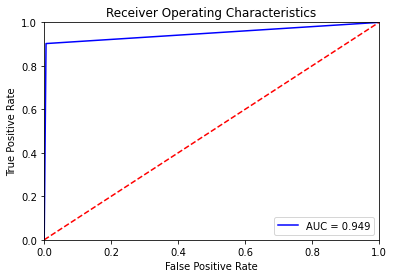

In [121]:
#fitting the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2021)

cv_rfc1 = RandomForestClassifier(random_state = 2021, criterion = 'gini', max_depth = 15, max_features ='auto', n_estimators = 700)
cv_rfc1.fit(X_train,y_train)
y_test_pred = cv_rfc1.predict(X_test)
y_pred = cv_rfc1.predict(X_train)
print('The Classification report on test set is: \n', classification_report(y_test,y_test_pred))

conf_matrix = pd.DataFrame(confusion_matrix(y_test,y_test_pred))

conf_matrix.index = ['actual employed', 'actual left']  #adding the actual - rows 
conf_matrix.columns = ['predicted employed', 'predicted left']  #adding predicted - columns

print(conf_matrix)

#auc_roc curve

proba_test = cv_rfc1.predict_proba(X_test)
pred_test = proba_test[:,1]

fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)


plt.title('Receiver Operating Characteristics')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [ ]:
#do pca